In [8]:
from db.connect_db import connect_to_db
from sqlalchemy import create_engine

import pandas as pd
import numpy as np
import holidays
from prophet import Prophet

In [9]:
engine = connect_to_db('root', 'root', 'etl_test')

In [10]:
query = '''
SELECT
    installationdate AS ds,
    COUNT(DISTINCT deviceid) AS y
FROM
    installs
WHERE
	source = 'Source_27'
	AND installcost = 0
GROUP BY
    installationdate
ORDER BY ds ASC;
'''

df = pd.read_sql(query, engine)

In [11]:
df.head()

,ds,y
0,2019-01-01,242
1,2019-01-02,248
2,2019-01-03,285
3,2019-01-04,288
4,2019-01-05,308


In [12]:
holidays_dict = holidays.RU(years=(2015, 2016, 2017, 2018, 2019, 2020, 2021))
df_holidays = pd.DataFrame.from_dict(holidays_dict, orient='index') \
    .reset_index()
df_holidays = df_holidays.rename({'index':'ds', 0:'holiday'}, axis ='columns')
df_holidays['ds'] = pd.to_datetime(df_holidays.ds)
df_holidays = df_holidays.sort_values(by=['ds'])
df_holidays = df_holidays.reset_index(drop=True)
df_holidays.tail()

,ds,holiday
93,2021-03-08,Международный женский день
94,2021-05-01,Праздник Весны и Труда
95,2021-05-09,День Победы
96,2021-06-12,День России
97,2021-11-04,День народного единства


In [15]:
predictions = 30

train_df = df[:-predictions]

In [18]:
m = Prophet(holidays=df_holidays, daily_seasonality=False, 
            weekly_seasonality=True, yearly_seasonality=False)
m.fit(train_df)

12:20:46 - cmdstanpy - INFO - Chain [1] start processing
12:20:47 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

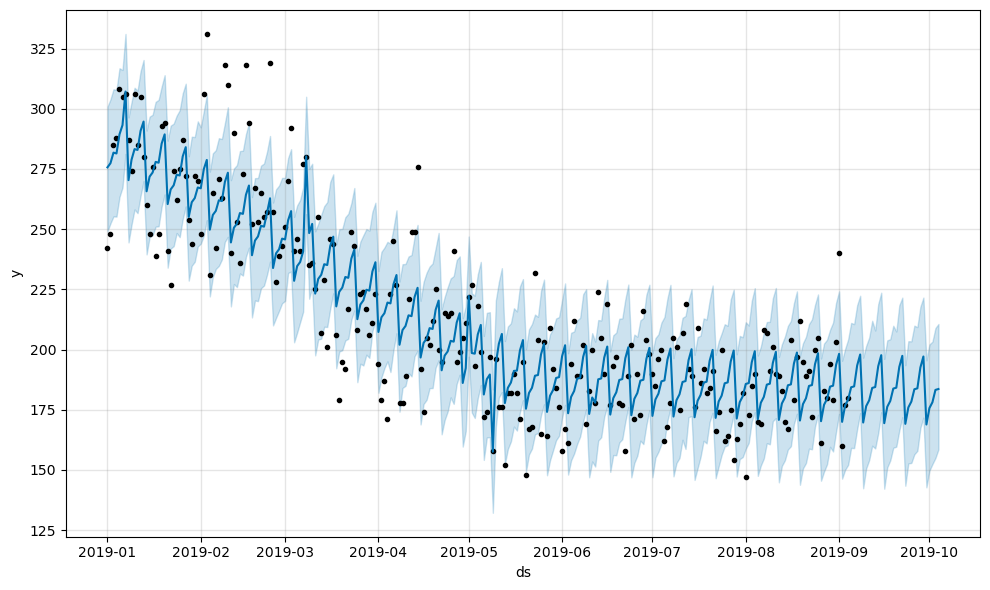

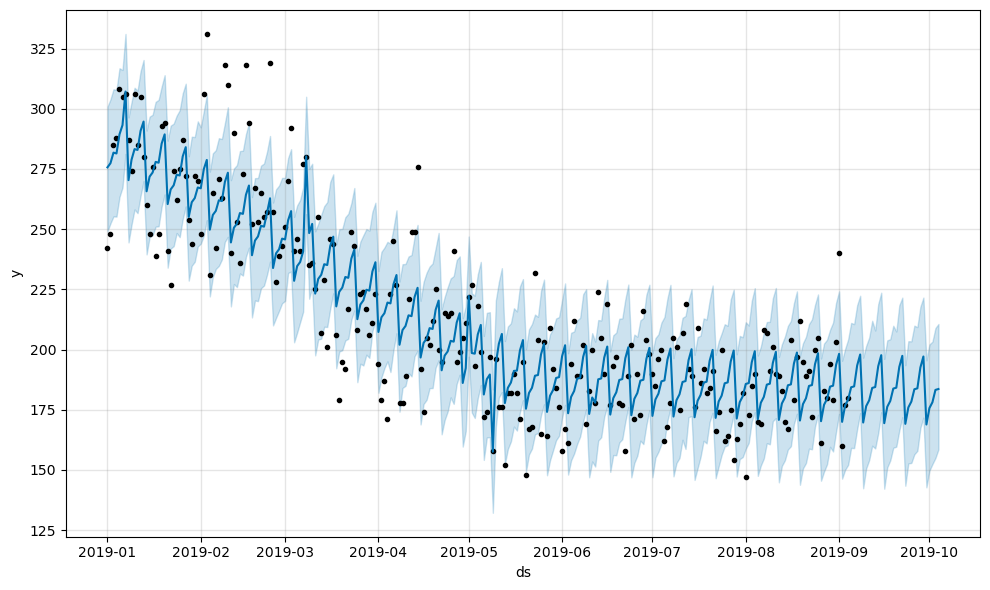

In [20]:
m.plot(forecast)

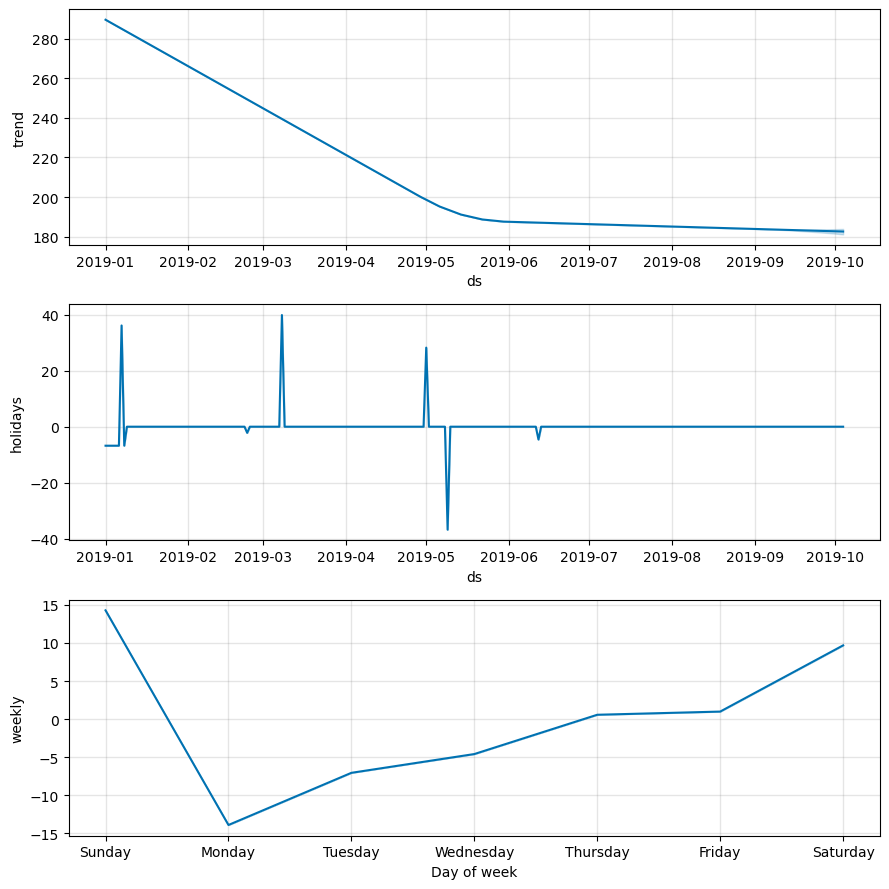

In [21]:
m.plot_components(forecast);